# DATA PREPROCESSING WITH BANK DATASET

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv('C:/Users/LENOVO/Downloads/bank/bank.csv', sep = ";")

In [10]:
x=data.copy()

In [11]:
x.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [15]:
x.isnull().sum()  #No null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
print(x.duplicated().value_counts()) # To check duplicated values

False    4521
dtype: int64


In [17]:
plt.rcParams["figure.figsize"] = (22, 3)
x._get_numeric_data().columns.tolist()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<AxesSubplot:>

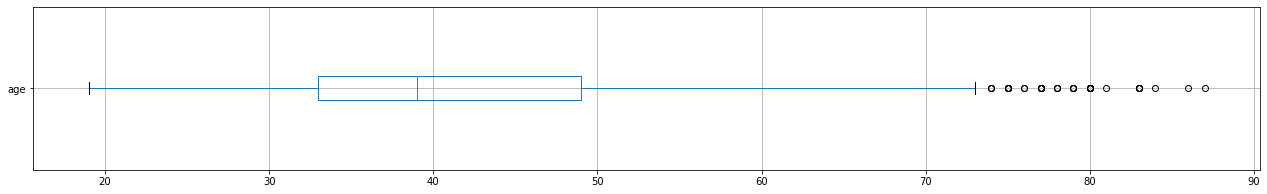

In [18]:
temp_df = pd.DataFrame(x, columns=['age'])
temp_df.boxplot(vert=False)

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

In [20]:
xa_Encode = x.copy()
xa_Encode.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:
features = ['default' ,'housing', 'loan','month', 'y','contact','education','poutcome','marital','job']
feature_label_dict = {
                  'default':{'no':0,'yes':1},
                  'housing':{'no':0,'yes':1},
                  'loan':{'no':0,'yes':1},
                  'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},
                  'y':{'no':0,'yes':1},
                  'contact':{'unknown':0, 'cellular':1, 'telephone':2},
                  'education':{'unknown':0, 'primary':1, 'secondary':2,'tertiary':3},
                  'poutcome':{'unknown':0,  'other':1, 'failure':2, 'success':3},
                  'marital':{  'divorced':0,'single':1,'married':2},
                  'job':{'unknown':0,'unemployed':1, 'student':2,'management':3, 'technician':4, 'entrepreneur':5, 'blue-collar':6, 'retired':7, 'admin.':8, 'services':9, 'self-employed':10, 'housemaid':11}
                 }

In [22]:
for f in features:     
  xa_Encode = xa_Encode.replace({f:feature_label_dict[f]})
  
  print ("Labelled as: ",feature_label_dict[f])

Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'unknown': 0, 'cellular': 1, 'telephone': 2}
Labelled as:  {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
Labelled as:  {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}
Labelled as:  {'divorced': 0, 'single': 1, 'married': 2}
Labelled as:  {'unknown': 0, 'unemployed': 1, 'student': 2, 'management': 3, 'technician': 4, 'entrepreneur': 5, 'blue-collar': 6, 'retired': 7, 'admin.': 8, 'services': 9, 'self-employed': 10, 'housemaid': 11}


In [23]:
xa_Encode.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,2,1,0,1787,0,0,1,19,10,79,1,-1,0,0,0
1,33,9,2,2,0,4789,1,1,1,11,5,220,1,339,4,2,0
2,35,3,1,3,0,1350,1,0,1,16,4,185,1,330,1,2,0
3,30,3,2,3,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,6,2,2,0,0,1,0,0,5,5,226,1,-1,0,0,0
